# **A Bayesian Network to model the influence of some healthcare risk factors on Stroke**

## By Priti Kumari Gupta, pritikumari.gupta@studio.unibo.it.

Fundamentals of AI and KR - Module 3,Paolo Torroni,Spring 2022.

## Introduction

A stroke is a medical condition in which poor blood flow to the brain causes cell death.A stroke is a medical condition in which poor blood flow to the brain causes cell death.

The reason behind choosing this dataset is According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

The Report is organized as follows:

<ol>1.A breif descripition of the datset used/Data Manipulation</ol>
<ol>2.Data Cleaning and Data Exploration</ol>
<ol>3.A detail view of Bayesian Model/CPT</ol>
<ol>4.Independencies</ol>
<ol>5.Markov Blanket and Active Trails</ol>
<ol>6.Variable Elimination Queries</ol>
<ol>7.References</ol>



In [93]:
pip install pgmpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Modules

In [94]:
from pandas import read_csv, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
from IPython.core.display import display, HTML
from pgmpy.independencies.Independencies import IndependenceAssertion
from pgmpy.inference import VariableElimination
from sklearn.preprocessing import LabelEncoder


# Reading csv file

The first section is the overview of the dataset,cleaning of the Dataset for making it more appropiate for calulating the probability, Data discretization and Data Exploration to know more about the Dataset.The Dataset Used in this project is from Kaggle dataset for Stroke prediction.The Dataset have 12 columns and 5110 records before Data cleaning. 
Each row in the data provides relavant information about the patient.

<ol>
  <li>gender: "Male", "Female" or "Other"</li>
  <li>age: age of the patient</li>
  <li>hypertension: 0 if the patient doesn't have hypertension, 1 if the      patient has hypertension</li>
<li>heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease</li>
<li>ever_married: "No" or "Yes"</li>
<li>work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"</li>
<li>Residence_type: "Rural" or "Urban"</li>
<li>avg_glucose_level: average glucose level in blood</li>
<li>bmi: body mass index</li>
<li>smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*</li>
<li>stroke: 1 if the patient had a stroke or 0 if not</li>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



In [95]:
df=pd.read_csv("/content/drive/MyDrive/health/healthcare-dataset-stroke-data.csv")
print("There are {} records and {} columns in the Dataframe\n".format(df.shape[0], df.shape[1]))
df.head()

There are 5110 records and 12 columns in the Dataframe



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [96]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Data Cleaning

*In data cleaning, I decided to remove the id column as it is not contributed to the target variable. I capitalize the first letter of columns' name for the sake of notational conventions. In this category I will set the target as Stroke and then find the rows with NaN values so that we will not have any empty values and will delete the values with the help of the pandas data frame by using dropna() function. In this dataset we have categorical and numerical  values with the help of the LabelEncoder() function  because for calculating the conditional probability, Numerical values are more accurate.*

In [97]:
df=df.drop('id',axis=1)

In [98]:

df.columns=df.columns.str.capitalize()
df.head()


,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<b>Set the target for the dataset</b>

*The target of the dataset is Stroke.with the help of different input parameters we will get the probabilty wheather a patient get stroke or not*

In [99]:
target='Stroke'

* find the Rows with NaN values and will drop Rows having NaN Values in Pandas DataFrame by using dropna() function*

In [100]:
df.isnull().sum()

Gender                 0
Age                    0
Hypertension           0
Heart_disease          0
Ever_married           0
Work_type              0
Residence_type         0
Avg_glucose_level      0
Bmi                  201
Smoking_status         0
Stroke                 0
dtype: int64

In [101]:
df.dropna(subset=['Bmi'],inplace=True)

*For calulating the CPT of the model,it better to convert all the categorical features into Numerical values so The probaility will be more accourate.in these dataset there are 5 Categorical Features. I need to transform the categorical Features into Numerical values with the help of LabelEncoder.*

In [102]:
def Labelencoder(a):
  lbl_encoder=LabelEncoder()
  df[a]=lbl_encoder.fit_transform(df[a])
  

In [103]:
Labelencoder('Gender')
Labelencoder('Ever_married')
Labelencoder('Work_type')
Labelencoder('Residence_type')
Labelencoder('Smoking_status')

In [104]:
df

,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


## Data Discretization

In machine learning, discretization refers to the process of converting or partitioning continuous attributes, features or variables to discretized or nominal attributes/features/variables/intervals. This can be useful when creating probability mass function.
	Categorizing ages column into different bins 0-20, 20-40, 40-60, 60+
	Categorizing Avg_glucose_level column into different bins Hypoglycemia, Healthy, Diabetic
	Categorizing Bmi column into different bins Underweight, Normal, Obese *italicized text*



<b>	Categorizing  ages column into different bins 0-20, 20-40, 40-60, 60+</b>

In [105]:
#Printing the min and max values of age in order to better discretize the age parameter
print(np.min(df['Age']), np.max(df['Age']))
df['Age']=pd.cut(x=df['Age'], bins=[np.min(df['Age']),20,40,60,np.max(df['Age'])], 
                        labels=["0-20","20-40", "40-60", "60+"])


0.08 82.0


<b>	Categorizing  Avg_glucose_level column into different bins Hypoglycemia, Healthy, Diabetic</b>

In [106]:
#Printing the min and max values of Avg_glucose_level in order to better discretize the Avg_glucose_level parameter
print(np.min(df['Avg_glucose_level']), np.max(df['Avg_glucose_level']))
df['Avg_glucose_level']=pd.cut(x=df['Avg_glucose_level'], bins=[np.min(df['Avg_glucose_level']),75,105,np.max(df['Avg_glucose_level'])], 
                        labels=["Hypoglycemia","Healthy", "Diabetic"])

55.12 271.74


<b>	Categorizing  Bmi column into different bins Underweight, Normal, Obese</b>

In [107]:
#Printing the min and max values of Bmi in order to better discretize the Bmi parameter
print(np.min(df['Bmi']), np.max(df['Bmi']))
df['Bmi']=pd.cut(x=df['Bmi'], bins=[np.min(df['Bmi']),18.5, 25, 30, np.max(df['Bmi'])], 
                        labels=["Underweight", "Normal", "Overweight", "Obese"])

10.3 97.6


## Data Exploration


In [108]:
df

,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
0,1,60+,0,1,1,2,1,Diabetic,Obese,1,1
2,1,60+,0,1,1,2,0,Diabetic,Obese,2,1
3,0,40-60,0,0,1,2,1,Diabetic,Obese,3,1
4,0,60+,1,0,1,3,0,Diabetic,Normal,2,1
5,1,60+,0,0,1,2,1,Diabetic,Overweight,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0-20,0,0,0,4,0,Healthy,Normal,0,0
5106,0,60+,0,0,1,3,1,Diabetic,Obese,2,0
5107,0,20-40,0,0,1,3,0,Healthy,Obese,2,0
5108,1,40-60,0,0,1,2,0,Diabetic,Overweight,1,0


In [109]:

df.describe()

,Gender,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Smoking_status,Stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,0.091872,0.049501,0.652679,2.170096,0.507232,1.375433,0.042575
std,0.492309,0.288875,0.216934,0.476167,1.092593,0.499999,1.067322,0.201917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             4909 non-null   int64   
 1   Age                4907 non-null   category
 2   Hypertension       4909 non-null   int64   
 3   Heart_disease      4909 non-null   int64   
 4   Ever_married       4909 non-null   int64   
 5   Work_type          4909 non-null   int64   
 6   Residence_type     4909 non-null   int64   
 7   Avg_glucose_level  4908 non-null   category
 8   Bmi                4908 non-null   category
 9   Smoking_status     4909 non-null   int64   
 10  Stroke             4909 non-null   int64   
dtypes: category(3), int64(8)
memory usage: 360.1 KB


Counting the values of Stroke(target) and other categorial values

In [111]:
df['Ever_married'].value_counts()

1    3204
0    1705
Name: Ever_married, dtype: int64

In [112]:
df['Work_type'].value_counts()

2    2811
3     775
4     671
0     630
1      22
Name: Work_type, dtype: int64

In [113]:
df['Residence_type'].value_counts()

1    2490
0    2419
Name: Residence_type, dtype: int64

In [114]:
df['Smoking_status'].value_counts()

2    1852
0    1483
1     837
3     737
Name: Smoking_status, dtype: int64

In [115]:
df['Stroke'].value_counts()

0    4700
1     209
Name: Stroke, dtype: int64

## Bayesian Model and CPT

Before calulating the CPT,we need to create the bayesian Model and need to create the connections between the nodes.For creating the connection between the nodes, I refer many scientific medical google search.
In creating the bayesian network I put 
<ol>
<li>'Gender','Age' and 'Residence_type' and 'Smoking_status' as independent nodes.</li>
<li>Bmi(Body mass index)-> A measure that relates body weight to height. BMI is sometimes used to measure total body fat and whether a person is a healthy weight.From the medical source  Bmi depends on the weight and height of the person only,not depends on age and gender of a person if the person is more than age of 20 but in our dataset the patient are under age of 20 also so I make Bmi depends on 'Age' only.</li>
<li>'Ever_married'->Age is one of the important factor for maritial status.Mostly a person married in the age between 20 t0 40.</li>
 
Age and Ever_married,https://www.jstor.org/stable/2087311

<li>Work_type-> is depend on whether the person is from Rural or urban.from the google search I found workers living in rural areas are more likely to be self-employed, compared with those in urban areas whrereas the workers living in Urban are mostly working in private sector.so from evidence 'Work_type' is depends on the 'Residence_type' node</li>

work_type and resident, https://www.iza.org/publications/dp/15059/living-in-rural-areas-and-self-employment

work_Type and resident, https://gsdrc.org/topic-guides/urban-governance/elements-of-effective-urban-governance/the-role-of-the-private-sector/ 
<li>Heart_Disease->Being overweight or obese can lead to many serious health conditions and can increase your risk of heart and circulatory diseases such as heart attack, stroke and vascular dementia.whereas smoking acutely increases systolic and diastolic blood pressure, total systemic vascular resistance, pulmonary artery pressure, and pulmonary vascular resistance, all known risk factors for heart attack or disease.so in our dataset 'Heart-disease' depends on 'Bmi'and 'Smoking_status'.</li>

Obesity and heart_disease, https://www.bhf.org.uk/informationsupport/risk-factors/obesity

Smoking and heart_disease, https://www.betterhealth.vic.gov.au/health/healthyliving/smoking-and-heart-disease

<li>Hypertension->Hypertension is a direct cardiovascular disease risk. It causes a heavy burden on the healthcare system globally.from the source Hypertension is directly dependent on 'Bmi','Ever_Married' status,'Smoking_status' and 'Work_type'.if a person being overweight or obese and having a habbit of smoking include higher prevalence of hypertension.
from google source We found that the relationship between marital status and health outcomes varied by gender. Being never married was an important risk factor for hypertension.
for work_type,the self employed workers have less hypertension risk as compared to the workers in private sector </li>

Smoking and Hypertension, https://pubmed.ncbi.nlm.nih.gov/16687420/

Married and Hypertension, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6476533/#:~:text=Conclusion,a%20lower%20risk%20of%20T2D.

Work_type and Hypertension, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7287446/

<li>Avg_Glucose_level->from the scientific medical research found that glucose level is directly dependent on Bmi and smoking.Obese or overweight person have greater chances of low or high sugar level in our blood as compared to normal Bmi person whereas Nicotine increases your blood sugar levels and makes them harder to handle. People with diabetes who smoke often need larger doses of insulin to keep their blood sugar close to their target levels.Work_type also depends on the sugar level of our body.more a person relax,sugar level will be normal.</li>

Work_type and GlucoseLevel, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4048595/#:~:text=Blood%20glucose%20level%20was%20positively,0.364%3B%20p%3D0.027)

Smoking and GlucoseLevel, https://www.cdc.gov/diabetes/library/features/smoking-and-diabetes.html#:~:text=Nicotine%20increases%20your%20blood%20sugar,close%20to%20their%20target%20levels.
</ol>

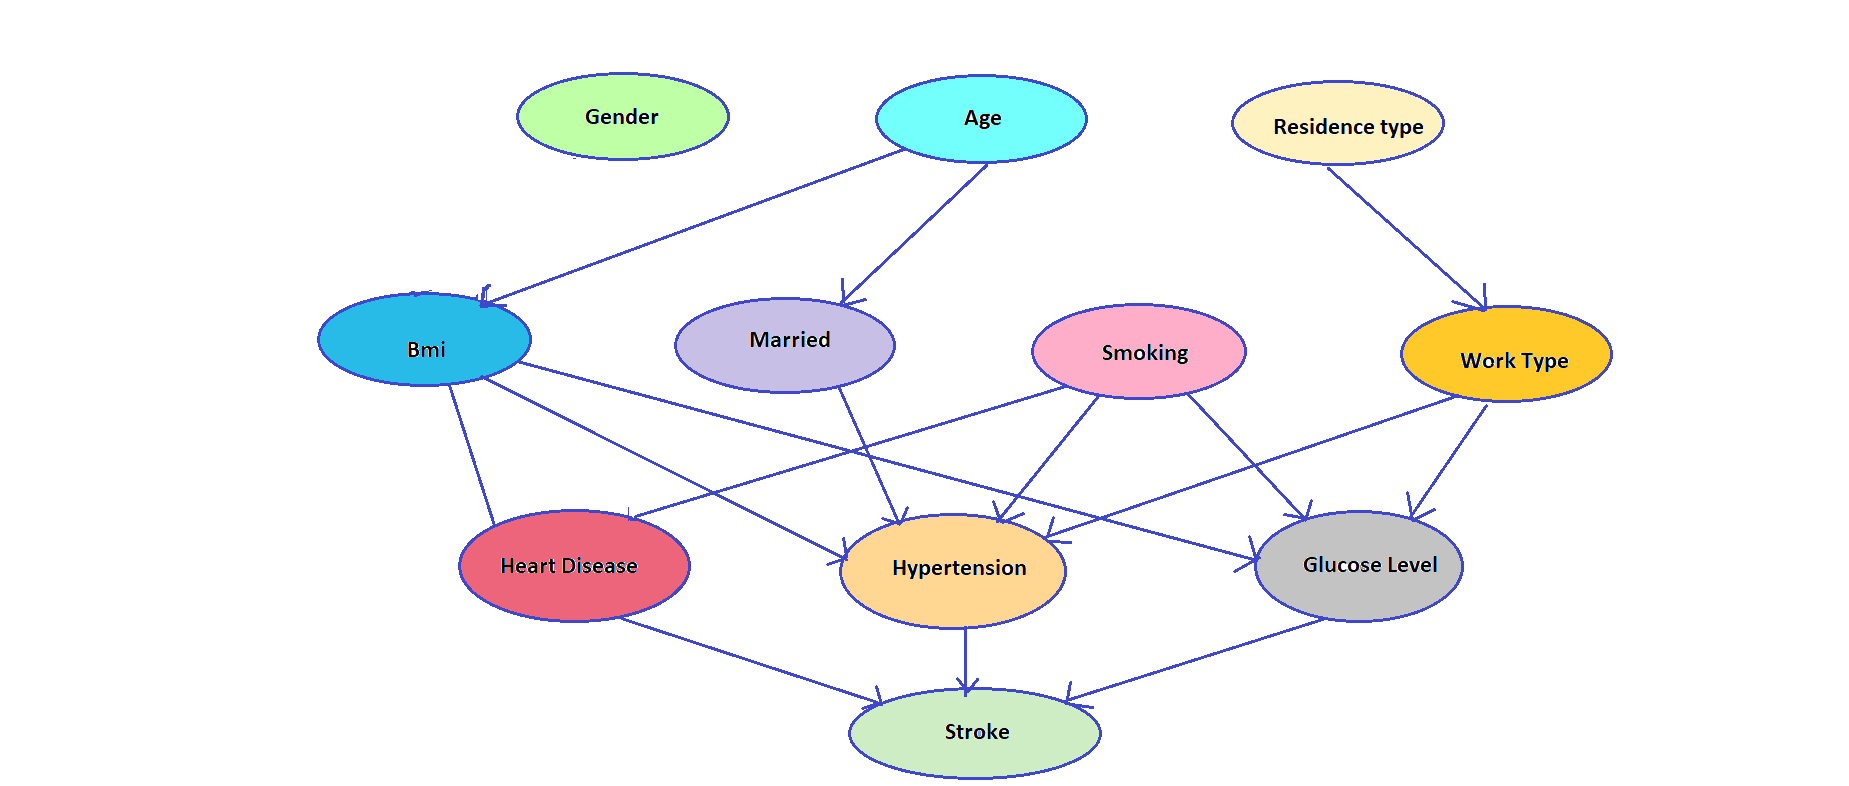

In [116]:
model=BayesianModel([('Age','Bmi'),
                     ('Age','Ever_married'),
                     ('Residence_type','Work_type'),
                     ('Bmi', 'Heart_disease'),('Smoking_status','Heart_disease'),
                     ('Bmi', 'Hypertension'),('Ever_married','Hypertension'),('Smoking_status','Hypertension'),('Work_type','Hypertension'),
                     ('Bmi', 'Avg_glucose_level'),('Smoking_status','Avg_glucose_level'),('Work_type','Avg_glucose_level'),
                     ('Heart_disease', 'Stroke'),('Hypertension', 'Stroke'),('Avg_glucose_level', 'Stroke') ])

                     

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


Showing all the Nodes of the Model

In [117]:
# Showing all the nodes of the model
print('Nodes',model.nodes(),'\n')

Nodes ['Age', 'Bmi', 'Ever_married', 'Residence_type', 'Work_type', 'Heart_disease', 'Smoking_status', 'Hypertension', 'Avg_glucose_level', 'Stroke'] 



Showing all the Edges of the model

In [118]:
# Showing all the edges of the model
print('Edges',model.edges())

Edges [('Age', 'Bmi'), ('Age', 'Ever_married'), ('Bmi', 'Heart_disease'), ('Bmi', 'Hypertension'), ('Bmi', 'Avg_glucose_level'), ('Ever_married', 'Hypertension'), ('Residence_type', 'Work_type'), ('Work_type', 'Hypertension'), ('Work_type', 'Avg_glucose_level'), ('Heart_disease', 'Stroke'), ('Smoking_status', 'Heart_disease'), ('Smoking_status', 'Hypertension'), ('Smoking_status', 'Avg_glucose_level'), ('Hypertension', 'Stroke'), ('Avg_glucose_level', 'Stroke')]


Model Diagram

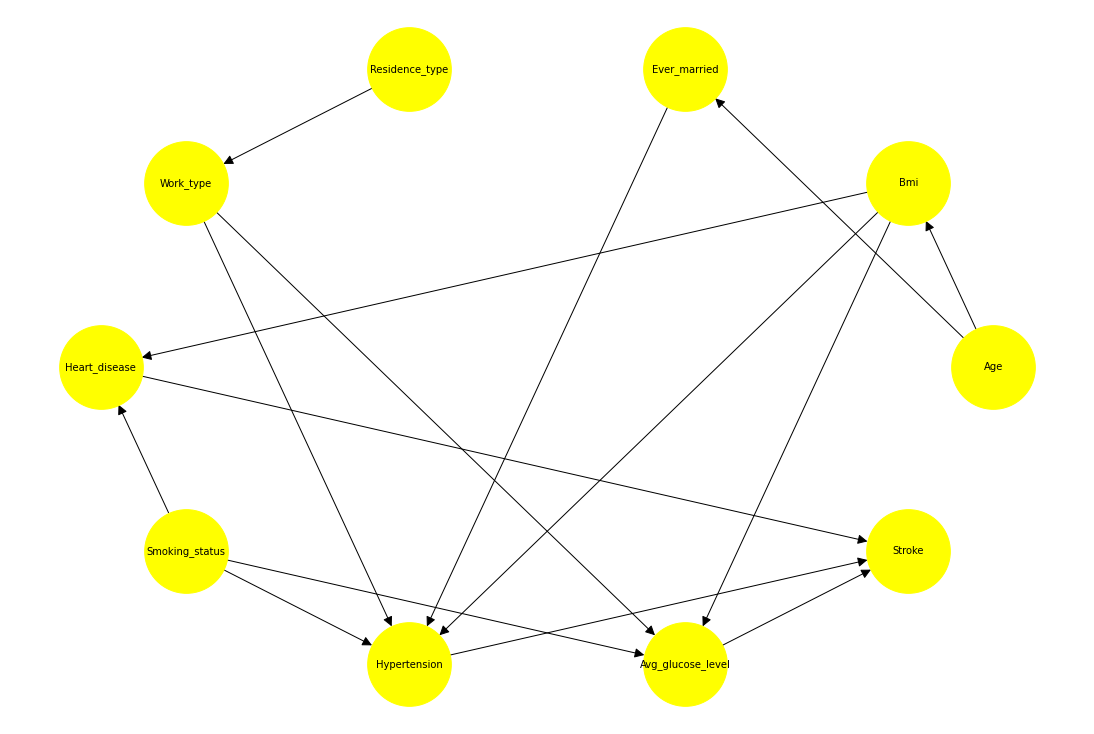

In [119]:
plt.figure(figsize=(15,10))
nx.draw_circular(model, with_labels=True, arrowsize=20, node_size=7000, font_size=10,node_color='yellow')
plt.show()

CPT

*The CPT is learned, by Estimator, taking into consideration about pros and cons of the estimator, instead of a Maximum Likelihood Estimator, I chose the Bayesian Estimator as it’s more robust. Pgmpy also offer a variety of possible priors, among them a possible choice is Bayesian Dirichlet equivalent uniform prior (BDeu), chosen with its default settings (i.e. equivalent_sample_size equal to 5). Then t the CPT are displayed.*

In [120]:
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

model.cpds = []
model.fit(data=df,
          estimator=BayesianEstimator,
          prior_type="BDeu",
          equivalent_sample_size=10,
          complete_samples_only=False)

print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of Age:
+------------+----------+
| Age(0-20)  | 0.203478 |
+------------+----------+
| Age(20-40) | 0.241306 |
+------------+----------+
| Age(40-60) | 0.3072   |
+------------+----------+
| Age(60+)   | 0.248017 |
+------------+----------+ 

CPT of Bmi:
+------------------+-----+----------------------+
| Age              | ... | Age(60+)             |
+------------------+-----+----------------------+
| Bmi(Normal)      | ... | 0.18009430094300943  |
+------------------+-----+----------------------+
| Bmi(Obese)       | ... | 0.4334768347683477   |
+------------------+-----+----------------------+
| Bmi(Overweight)  | ... | 0.37197621976219764  |
+------------------+-----+----------------------+
| Bmi(Underweight) | ... | 0.014452644526445265 |
+------------------+-----+----------------------+ 

CPT of Ever_married:
+-----------------+-----+---------------------+
| Age             | ... | Age(60+)            |
+-----------------+-----+---------------------+
| Ev

## Analysing the Network


## Independencies

I used  method ‘local_independencies()’ from pgmpy to get the local independencies of each node.

In [121]:
# Local independecies of a each node
for i in model.nodes():
  print(" Independencies :",i,'\n',model.local_independencies(i))
  print(" Descendants :",i,'\n',model.get_children(i))
  print('\n')

 Independencies : Age 
 (Age ⟂ Residence_type, Work_type, Smoking_status)
 Descendants : Age 
 ['Bmi', 'Ever_married']


 Independencies : Bmi 
 (Bmi ⟂ Ever_married, Work_type, Smoking_status, Residence_type | Age)
 Descendants : Bmi 
 ['Heart_disease', 'Hypertension', 'Avg_glucose_level']


 Independencies : Ever_married 
 (Ever_married ⟂ Heart_disease, Residence_type, Avg_glucose_level, Work_type, Bmi, Smoking_status | Age)
 Descendants : Ever_married 
 ['Hypertension']


 Independencies : Residence_type 
 (Residence_type ⟂ Age, Heart_disease, Ever_married, Bmi, Smoking_status)
 Descendants : Residence_type 
 ['Work_type']


 Independencies : Work_type 
 (Work_type ⟂ Age, Ever_married, Heart_disease, Bmi, Smoking_status | Residence_type)
 Descendants : Work_type 
 ['Hypertension', 'Avg_glucose_level']


 Independencies : Heart_disease 
 (Heart_disease ⟂ Age, Ever_married, Residence_type, Avg_glucose_level, Work_type, Hypertension | Bmi, Smoking_status)
 Descendants : Heart_disease 
 

## Markov Blanket and Active Trails

In pgmpy it’s possible to investigate different properties of the network. In fact, I implemented the functions ‘active_trails_of()’, which returns all the nodes reachable from start via an active trail, and ‘markov blanket()’ , which returns the set of node’s parents, its children and its children’s other parents.

In [122]:
# Checking the markov blanket of each node
for i in model.nodes():
  print("Markov Blanket: ",i,'\n',model.get_markov_blanket(i))
  print('\n')

Markov Blanket:  Age 
 ['Ever_married', 'Bmi']


Markov Blanket:  Bmi 
 ['Work_type', 'Age', 'Heart_disease', 'Ever_married', 'Avg_glucose_level', 'Hypertension', 'Smoking_status']


Markov Blanket:  Ever_married 
 ['Work_type', 'Bmi', 'Age', 'Hypertension', 'Smoking_status']


Markov Blanket:  Residence_type 
 ['Work_type']


Markov Blanket:  Work_type 
 ['Bmi', 'Ever_married', 'Residence_type', 'Avg_glucose_level', 'Hypertension', 'Smoking_status']


Markov Blanket:  Heart_disease 
 ['Bmi', 'Stroke', 'Avg_glucose_level', 'Hypertension', 'Smoking_status']


Markov Blanket:  Smoking_status 
 ['Work_type', 'Bmi', 'Heart_disease', 'Ever_married', 'Avg_glucose_level', 'Hypertension']


Markov Blanket:  Hypertension 
 ['Work_type', 'Bmi', 'Ever_married', 'Heart_disease', 'Stroke', 'Avg_glucose_level', 'Smoking_status']


Markov Blanket:  Avg_glucose_level 
 ['Work_type', 'Bmi', 'Heart_disease', 'Stroke', 'Hypertension', 'Smoking_status']


Markov Blanket:  Stroke 
 ['Avg_glucose_level', 'H

In [123]:
# Checking active trails between variables with  evidence
def active_trails_of(query, evidence):
    a = model.active_trail_nodes(query, observed=evidence).get(query)
    a.remove(query)
    if a:
        if evidence:
            print(f'Active trails between \'{query}\' and {a} given the evidence {set(evidence)}.')
        else:
            print(f'Active trails between \'{query}\' and {a} given no evidence.')
    else:
        print(f'No Active trails for \'{query}\' given the evidence {set(evidence)}.')

active_trails_of(query='Stroke', evidence=[])
active_trails_of(query='Stroke', evidence=['Hypertension'])
active_trails_of(query='Stroke', evidence=[])
active_trails_of(query='Hypertension', evidence=['Heart_disease','Age'])
active_trails_of(query='Work_type', evidence=[])

# Checking d-separation between variables without evidence
model.is_dconnected("Hypertension","Stroke")
model.active_trail_nodes('Work_type')


Active trails between 'Stroke' and {'Work_type', 'Bmi', 'Age', 'Heart_disease', 'Ever_married', 'Residence_type', 'Avg_glucose_level', 'Hypertension', 'Smoking_status'} given no evidence.
Active trails between 'Stroke' and {'Work_type', 'Bmi', 'Age', 'Heart_disease', 'Ever_married', 'Residence_type', 'Avg_glucose_level', 'Smoking_status'} given the evidence {'Hypertension'}.
Active trails between 'Stroke' and {'Work_type', 'Bmi', 'Age', 'Heart_disease', 'Ever_married', 'Residence_type', 'Avg_glucose_level', 'Hypertension', 'Smoking_status'} given no evidence.
Active trails between 'Hypertension' and {'Work_type', 'Bmi', 'Ever_married', 'Stroke', 'Residence_type', 'Avg_glucose_level', 'Smoking_status'} given the evidence {'Age', 'Heart_disease'}.
Active trails between 'Work_type' and {'Stroke', 'Residence_type', 'Avg_glucose_level', 'Hypertension'} given no evidence.


{'Work_type': {'Avg_glucose_level',
  'Hypertension',
  'Residence_type',
  'Stroke',
  'Work_type'}}

To find the Parents and children of target

In [124]:
model.get_children(target)
model.get_parents(target)

['Heart_disease', 'Hypertension', 'Avg_glucose_level']

In [125]:
model.get_children(target)
model.get_parents(target)

['Heart_disease', 'Hypertension', 'Avg_glucose_level']

## Variable Elimination Queries

The variable elimination algorithm acts on a set of factor, which involves a set of variables. Each node in a Bayesian network is equipped with a conditional probability function that expresses the likelihood that the node will take on different values given the values of its parents. Thus, given the probabilistic model created, I am interested in using this algorithm to answer questions that are useful in establishing an individual's risk of stroke. Let’s analyze some queries:

In [126]:
Stroke_inference=VariableElimination(model)

**Query 1:P(Stroke|, Avg_glucose_level=Diabetic,Smoking_status=2) 
where Smoking_status=2 denotes the person 'Never Smoked'.**

In [127]:
#Causal inference (prediction) will he/she have an Stroke given his Avg_glucose_level but not have never smoked?
q_1=Stroke_inference.query(['Stroke'],evidence={'Avg_glucose_level':'Diabetic','Smoking_status':2})
print('\n\nPStroke|Avg_glucose_level=Diabetic, Smoking_status=2')
print(q_1)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]



PStroke|Avg_glucose_level=Diabetic, Smoking_status=2
+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9367 |
+-----------+---------------+
| Stroke(1) |        0.0633 |
+-----------+---------------+


**Query 2: P(Stroke|Hypertension=1,Smoking_status=0) where Smoking_status=1 denotes the patient had smoking background.**


In [128]:
#Causal inference (prediction) will he/she have an Stroke given his Hypertension and have smoking habbit?
q_2=Stroke_inference.query(['Stroke'],evidence={'Hypertension':1,'Smoking_status':1})
print('\n\nPStroke|Hypertension=1,Smoking_status=0')
print(q_2)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]



PStroke|Hypertension=1,Smoking_status=0
+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.8740 |
+-----------+---------------+
| Stroke(1) |        0.1260 |
+-----------+---------------+


**Query 3:P(Avg_glucose_level|Stroke:True)**

In [129]:
#Evidential inference (explaination) explaining the prob of Avg_glucose_level given that he had an Stroke
q_3=Stroke_inference.query(['Avg_glucose_level'],evidence={'Stroke':1})
print('\n\nPAvg_glucose_level|Stroke:True')
print(q_3)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]



PAvg_glucose_level|Stroke:True
+---------------------------------+--------------------------+
| Avg_glucose_level               |   phi(Avg_glucose_level) |
+=================================+==========================+
| Avg_glucose_level(Diabetic)     |                   0.4560 |
+---------------------------------+--------------------------+
| Avg_glucose_level(Healthy)      |                   0.3133 |
+---------------------------------+--------------------------+
| Avg_glucose_level(Hypoglycemia) |                   0.2307 |
+---------------------------------+--------------------------+


**Query 4:P(Heart_disease|'Stroke':1,'Smoking_status':2(never Smoked))**

In [130]:
#Intercausal inference- he had an Stroke given the fact that he/she didn't have Smoking_status?
q_4=Stroke_inference.query(['Heart_disease'],evidence={'Stroke':1,'Smoking_status':2})
print('\n\nPHeart_disease|Stroke:1,Smoking_status:')
print(q_4)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]



PHeart_disease|Stroke:1,Smoking_status:
+------------------+----------------------+
| Heart_disease    |   phi(Heart_disease) |
+==================+======================+
| Heart_disease(0) |               0.8703 |
+------------------+----------------------+
| Heart_disease(1) |               0.1297 |
+------------------+----------------------+


**Query 5:P(Stroke|'Heart_disease':1,'Avg_glucose_level':'Diabetic','Hypertension':1)(Both heart_disease and Hypertension problem)**

In [131]:
#Inferences using hard evidence
q_5=Stroke_inference.query(['Stroke'],evidence={'Heart_disease':1,'Avg_glucose_level':'Diabetic','Hypertension':1})
print('\n\nPStroke|Heart_disease:1,Avg_glucose_level:Diabetic,Hypertension:1')
print(q_5)

0it [00:00, ?it/s]

0it [00:00, ?it/s]



PStroke|Heart_disease:1,Avg_glucose_level:Diabetic,Hypertension:1
+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.7584 |
+-----------+---------------+
| Stroke(1) |        0.2416 |
+-----------+---------------+


**Query6:Probability of an Stroke occurred given the Age**

In [132]:
for i in (list(df["Age"].value_counts().index)):
  print("Probability of an Stroke occurred given the Age:",i)
  print(Stroke_inference.query(["Stroke"], evidence={"Age":i}))

Probability of an Stroke occurred given the Age: 40-60


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9504 |
+-----------+---------------+
| Stroke(1) |        0.0496 |
+-----------+---------------+
Probability of an Stroke occurred given the Age: 60+


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9508 |
+-----------+---------------+
| Stroke(1) |        0.0492 |
+-----------+---------------+
Probability of an Stroke occurred given the Age: 20-40


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9545 |
+-----------+---------------+
| Stroke(1) |        0.0455 |
+-----------+---------------+
Probability of an Stroke occurred given the Age: 0-20


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9621 |
+-----------+---------------+
| Stroke(1) |        0.0379 |
+-----------+---------------+


**Query7:Probability of an Stroke occurred given the Ever_married**

In [133]:
for i in (list(df["Ever_married"].value_counts().index)):
  print("Probability of an Stroke occurred given the Ever_married:",i)
  print(Stroke_inference.query(["Stroke"], evidence={"Ever_married":i}))

Probability of an Stroke occurred given the Ever_married: 1


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9500 |
+-----------+---------------+
| Stroke(1) |        0.0500 |
+-----------+---------------+
Probability of an Stroke occurred given the Ever_married: 0


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9611 |
+-----------+---------------+
| Stroke(1) |        0.0389 |
+-----------+---------------+


*In this Query the non controllable factors like 'Age'and 'Ever_married' is taken into account, the realtionship between the Age of a person with the chances having the stroke or not having the Stroke.We divided the age in different category between 0-20,20-40,40-60 and 60+.with the evidences we can infer that number of patient victims of the Stroke in the age of 0-20 is less as compared to the patient in the age of 40-60 and 60+.but there is no major difference in the age group of 40-60 and 60+.
In the relationship between Ever_married and stroke,we can see the probability that the number of patient victims of the stroke is more if the patient is married as compared to the patient who is not married*

**Query8:Probability of an Stroke occurred given the Bmi**

In [134]:

for i in (list(df["Bmi"].value_counts().index)):
  print("Probability of an Stroke occurred given the Bmi:",i)
  print(Stroke_inference.query(["Stroke"], evidence={"Bmi":i}))

Probability of an Stroke occurred given the Bmi: Obese


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9482 |
+-----------+---------------+
| Stroke(1) |        0.0518 |
+-----------+---------------+
Probability of an Stroke occurred given the Bmi: Overweight


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9538 |
+-----------+---------------+
| Stroke(1) |        0.0462 |
+-----------+---------------+
Probability of an Stroke occurred given the Bmi: Normal


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9613 |
+-----------+---------------+
| Stroke(1) |        0.0387 |
+-----------+---------------+
Probability of an Stroke occurred given the Bmi: Underweight


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9585 |
+-----------+---------------+
| Stroke(1) |        0.0415 |
+-----------+---------------+


*In this Query the mediun controllable factors like 'Bmi' is taken into account, the realtionship between the Bmi of a person with the chances having the stroke or not having the Stroke.We divided the Bmi in different category between Underweight,Normal,Obese and overweight.with the evidences we can infer that the probability of patient victims of the Stroke having Bmi='Normal' is less as compared to the patient having Bmi=Underweight,Obese and Overweight.The patient having 'Bmi'=Obese have the maximum probaility of having the Stroke,the 2nd highest probability having the Stroke with the patient having the 'Bmi'=Overweight.


**Query9:Probability of an Stroke occurred given the Heart Disease**

In [135]:
for i in (list(df["Heart_disease"].value_counts().index)):
  print("Probability of an Stroke occurred given the Heart_disease:",i)
  print(Stroke_inference.query(["Stroke"], evidence={"Heart_disease":i}))

Probability of an Stroke occurred given the Heart_disease: 0


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9591 |
+-----------+---------------+
| Stroke(1) |        0.0409 |
+-----------+---------------+
Probability of an Stroke occurred given the Heart_disease: 1


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.8572 |
+-----------+---------------+
| Stroke(1) |        0.1428 |
+-----------+---------------+


**Query10:Probability of an Stroke occurred given the Hypertension**

In [136]:
for i in (list(df["Hypertension"].value_counts().index)):
  print("Probability of an Stroke occurred given the Hypertension:",i)
  print(Stroke_inference.query(["Stroke"], evidence={"Hypertension":i}))


Probability of an Stroke occurred given the Hypertension: 0


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9660 |
+-----------+---------------+
| Stroke(1) |        0.0340 |
+-----------+---------------+
Probability of an Stroke occurred given the Hypertension: 1


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.8763 |
+-----------+---------------+
| Stroke(1) |        0.1237 |
+-----------+---------------+


**Query11:Probability of an Stroke occurred given the Avg_glucose_Level**

In [137]:

for i in (list(df["Avg_glucose_level"].value_counts().index)):
  print("Probability of an Stroke occurred given the Avg_glucose_level:",i)
  print(Stroke_inference.query(["Stroke"], evidence={"Avg_glucose_level":i}))

Probability of an Stroke occurred given the Avg_glucose_level: Healthy


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9677 |
+-----------+---------------+
| Stroke(1) |        0.0323 |
+-----------+---------------+
Probability of an Stroke occurred given the Avg_glucose_level: Diabetic


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9359 |
+-----------+---------------+
| Stroke(1) |        0.0641 |
+-----------+---------------+
Probability of an Stroke occurred given the Avg_glucose_level: Hypoglycemia


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9527 |
+-----------+---------------+
| Stroke(1) |        0.0473 |
+-----------+---------------+


Given the Bayesian Network structure,the three major factors that influenced the probaility of the having a 'Stroke' in a patient is 'Heat_disease','Hypertenson' and 'Avg_glucose_level'.in the above table It was clear the probability of having a 'Stroke' is much more if the patient is suffered from 'Heart_disease'=1,'Hypertension'=1 and the 'Avg_glucose_level'='Diabetic'. as compared to the patient not having the Heart_disease=0 and 'Hypertension'=0 with 'Avg_glucose_level'='Normal'.

In [138]:
print(Stroke_inference.query(["Stroke"], evidence={'Heart_disease':0, 'Hypertension':0, 'Avg_glucose_level':'Healthy'}))
print(Stroke_inference.query(["Stroke"], evidence={"Heart_disease": 1, "Hypertension":1,"Avg_glucose_level":"Diabetic"}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.9740 |
+-----------+---------------+
| Stroke(1) |        0.0260 |
+-----------+---------------+


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| Stroke    |   phi(Stroke) |
+===========+===============+
| Stroke(0) |        0.7584 |
+-----------+---------------+
| Stroke(1) |        0.2416 |
+-----------+---------------+


From the above inference Query it can be easily seen that the probability of getting a stroke to a Diebetic patient suffering from Heart_disease,Hypertension is much high as compared to a healthy person having no Heart_disease and Hypertension. 

##References
[1]Kaggle dataset, https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 
[2]	‘pgmpy’ Documentation, https://pgmpy.org/models/naive.html                   
[3]	‘pgmpy’ Documentation, https://pgmpy.org/models/markovnetwork.html           
[4]	‘pgmpy’ Documentation, https://pgmpy.org/base.html                           
[5]	‘pgmpy’ Documentation, https://pgmpy.readthedocs.io/en/latest/_modules/pgmpy/independencies/Independencies.html
